In [21]:
#Standard imports
import os
#Third party imports
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


#Local imports

```
    Linear Regression Project —
    Predict weight based on height using pandas, numpy, matplotlib, scikit-learn.

    Steps covered:
    1. Load data
    2. Inspect & clean
    3. Visualize
    4. Split data
    5. Train Linear Regression model
    6. Evaluate model using MAE, MSE, RMSE, R2
    7. Plot regression line
    8. Predict new values
"""

In [22]:
df = pd.read_csv("datasets/SOCR-HeightWeight.csv")
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [23]:
df.describe()

,Index,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


In [24]:
df.shape

(25000, 3)

Checking for null values

In [25]:
print("\nMissing values:\n",df.isnull().sum())


Missing values:
 Index             0
Height(Inches)    0
Weight(Pounds)    0
dtype: int64


# Visualization of the data

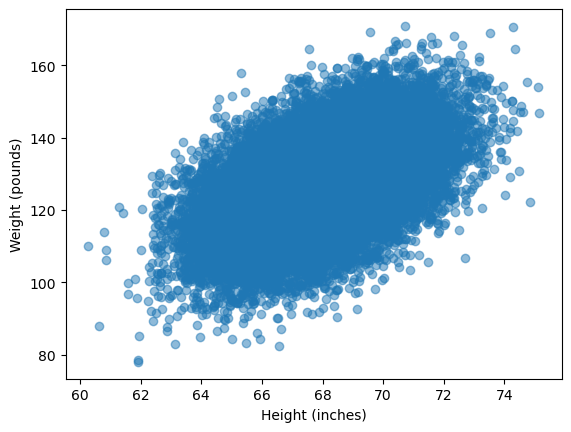

In [26]:
# Rename columns to simpler names
df.rename(columns={"Height(Inches)": "Height", "Weight(Pounds)": "Weight"}, inplace=True)

# Now we can plot easily
plt.scatter(df["Height"], df["Weight"], alpha=0.5)
plt.xlabel("Height (inches)")
plt.ylabel("Weight (pounds)")
plt.show()


## Histogram on the basis of height and weight

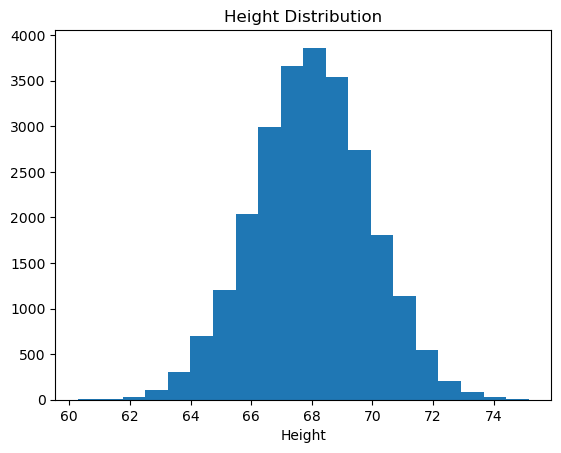

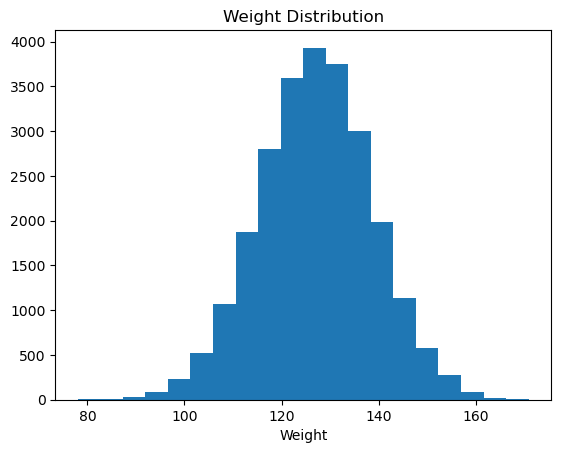

In [27]:
plt.hist(df["Height"], bins=20)
plt.title("Height Distribution")
plt.xlabel("Height")
plt.show()

plt.hist(df["Weight"], bins=20)
plt.title("Weight Distribution")
plt.xlabel("Weight")
plt.show()

### Prepare X and Y

In [28]:
X = df[["Height"]]  # 2D dataframe -> feature
y = df["Weight"]    # target variable

In [29]:
X.shape , y.shape

((25000, 1), (25000,))

# Train/Test Split

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)
print(X_train.shape[0], X_test.shape[0])

20000 5000


In [31]:
X_train.shape , X_test.shape , y_train.shape, y_test.shape

((20000, 1), (5000, 1), (20000,), (5000,))

# Let us train the model using Simple Linear Regression
Simple Linear Regression is a supervised machine learning algorithm used to predict a continuous numerical value based on one independent variable.

It tries to find a straight-line relationship between:

X → input / independent variable (e.g., height)

Y → output / dependent variable (e.g., weight)

In [32]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [33]:
model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [34]:
model.fit(X_train, y_train)
model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [35]:
print("The slope or coeffiecient of weight is:",model.coef_)
print("The intercept of the line is :", model.intercept_)

The slope or coeffiecient of weight is: [3.07124501]
The intercept of the line is : -81.7368622824152


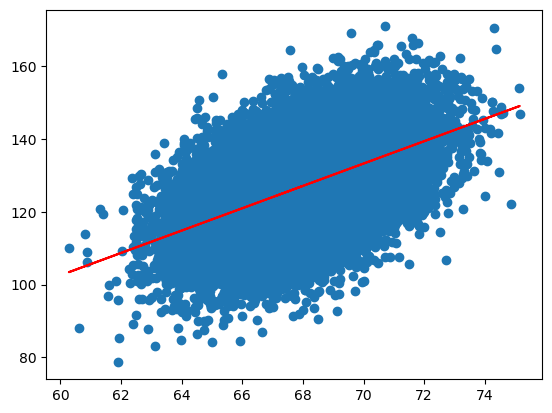

In [36]:
plt.scatter(X_train, y_train)
plt.plot(X_train,model.predict(X_train),'r')

plt.show()

In [37]:
Y_pred_test = model.predict(X_test)


In [40]:
Y_pred_test, y_test

(array([128.41144971, 126.79032375, 126.06117947, ..., 128.86141782,
        124.33022578, 135.00025306], shape=(5000,)),
 6868     134.2855
 24016    111.9666
 9668     135.9871
 13640    126.3802
 14018    100.1810
            ...   
 8670     138.0941
 11839    105.2101
 4013     141.1859
 21147    129.5261
 695      134.7527
 Name: Weight, Length: 5000, dtype: float64)

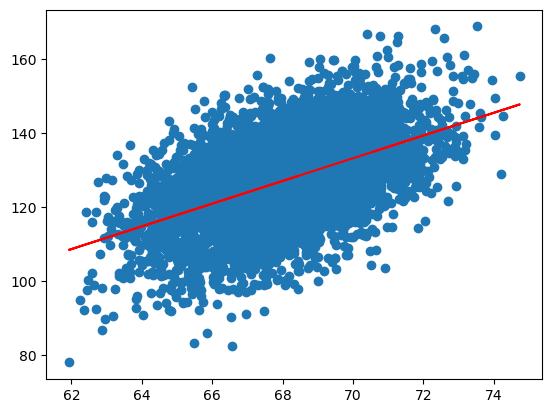

In [42]:
plt.scatter(X_test,y_test)
plt.plot(X_test, model.predict(X_test),'r')

plt.show()

# Performance metrics 
Mean Squared Errors : MSE measures the average of the squared differences between actual and predicted values.

-MSE punishes bigger errors much more because it squares them.

-It is useful when you want the model to avoid large mistakes.

Mean Absolute Error : MAE measures the average of all the absolute differences between actual and predicted values.

-It tells you how wrong the predictions are on average.

-It treats all errors equally—no extra punishment for big mistakes



In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, Y_pred_test)
mae= mean_absolute_error(y_test, Y_pred_test)
rmse = np.sqrt(mse)
print("Mean squared error: ",mse)
print("Root mean squared error: ",rmse)
print("Mean absolute error: ", mae)

Mean squared error:  102.48790963792533
Root mean squared error:  10.12363124762678
Mean absolute error:  8.034767997494628


In [44]:
from sklearn.metrics import r2_score
score = r2_score(y_test, Y_pred_test)
print("R-squared score: ", score * 100, '%')
     

R-squared score:  26.059113512888576 %


In [45]:
adjusted_r2_score = 1-(1-score) * (len(y_test)-1) / (len(y_test)-X_test.shape[1]-1)
print("Adjusted R2 score: ", adjusted_r2_score*100,'%')

Adjusted R2 score:  26.044319417953187 %
